<a href="https://colab.research.google.com/github/AndSiq97/Prediction-Practice-/blob/main/Prediction_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd  
import numpy as np  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score as acc
import statsmodels.api as sm
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
#from skfeature.function.similarity_based import fisher_score
from sklearn.metrics import confusion_matrix
#!pip install --upgrade matplotlib
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle


# **Attribute Information**
### **Features**
1. **X1**
2. **X2**
3. **X3**
4. **X4**
5. **X5**
6. **X6**
7. **X7**
8. **X8**
9. **X9**
10. **X10**
11. **X11**
12. **X12**
13. **X13**
14. **X14**
15. **X15**
16. **X16**
17. **X17**
18. **X18**
19. **X19**
20. **X20**
21. **X21**
22. **X22**
23. **X23**
24. **X24**
25. **X25**
26. **X26**
27. **X27**
28. **X28**

# **Target**
*   **y**

Load Data

In [ ]:
# Reading training CSV file as Pandas DataFrame
df = pd.read_csv('/content/gdrive/MyDrive/trainingdata.csv')
df.head()

,y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28
0,2.661730,0.307466,0.824116,-0.846733,-0.143638,0.300534,-1.359660,0.628861,-0.279597,0.157514,0.540438,1.007308,1,0.480942,0.363332,-0.974595,1.101706,0.997576,-0.725205,0.696181,-1.262254,1.296678,0.614138,1.752095,0.281323,1.558272,-0.023032,-1.365495,0.427185
1,-0.227966,-1.315402,1.116190,1.225239,0.469824,0.384232,-2.042583,0.395624,-0.279597,-0.815925,-0.511833,-0.991781,-1,0.480942,1.680785,-0.974595,-0.458312,0.997576,-0.535517,-0.558306,0.837044,-0.676638,0.624464,1.686952,0.947605,-1.082189,0.268123,1.668811,-1.522387
2,-1.389091,-1.074268,-0.367363,1.095546,-1.089587,0.769244,1.387467,0.282123,-0.675355,1.455433,0.540438,-0.991781,1,-1.596081,1.477208,-0.974595,0.789703,-1.001457,-1.273894,-0.100169,1.647375,0.823037,-0.151400,-0.937613,-0.582855,0.522557,1.409339,-0.881565,-1.712130
3,-0.311765,0.161063,-0.856472,0.825221,0.207580,-0.034259,-1.207899,0.516608,-0.279597,-1.140404,0.540438,-0.991781,1,0.480942,-1.507049,1.025072,-0.770316,-1.001457,1.679620,-1.118178,-0.362336,0.450474,-1.657461,-0.961080,1.174146,-0.756722,0.273199,-0.008019,-0.195380
4,-5.001239,0.230915,1.502146,-0.846733,1.027091,-1.038638,-0.096702,-1.778344,-0.612034,0.806474,1.592709,1.007308,-2,0.480942,0.557032,1.025072,-0.770316,-1.001457,1.185550,-0.363926,0.931707,-1.314802,-0.039129,-0.654889,1.490478,-0.991157,-0.483739,-1.675171,-1.391101


Data Inspection and Analysis

In [ ]:
# Names of Columns in DataFrame
df.columns

Index(['y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28'],
      dtype='object')

In [ ]:
# Checking size/shape of DataFrame
df.shape

(500, 29)

In [ ]:
# Basic information about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       500 non-null    float64
 1   X1      500 non-null    float64
 2   X2      500 non-null    float64
 3   X3      500 non-null    float64
 4   X4      500 non-null    float64
 5   X5      500 non-null    float64
 6   X6      500 non-null    float64
 7   X7      500 non-null    float64
 8   X8      500 non-null    float64
 9   X9      500 non-null    float64
 10  X10     500 non-null    float64
 11  X11     500 non-null    float64
 12  X12     500 non-null    int64  
 13  X13     500 non-null    float64
 14  X14     500 non-null    float64
 15  X15     500 non-null    float64
 16  X16     500 non-null    float64
 17  X17     500 non-null    float64
 18  X18     500 non-null    float64
 19  X19     500 non-null    float64
 20  X20     500 non-null    float64
 21  X21     500 non-null    float64
 22  X2

In [ ]:
# Basic statistics to describe DataFrame
df.describe()

,y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.010517,-0.006884,0.022327,-0.021294,0.048127,-0.018022,0.016247,-0.022152,-0.012286,-0.031333,-0.015161,0.007763,0.022000,-0.046622,-0.034082,0.045235,-0.036483,0.026046,-0.009348,0.011672,-0.009500,0.012835,0.078473,-0.030618,-0.062715,0.045917,0.021533,0.029424,0.025474
std,1.644108,0.988253,1.012766,0.983444,0.985088,0.943918,0.983456,1.043192,0.947292,1.004654,1.006581,1.000546,1.044844,1.004626,1.009920,1.000634,1.021809,1.000125,0.992095,0.987141,1.041852,0.978020,0.988974,0.998653,0.989441,0.980964,1.009297,1.042343,1.017929
min,-6.011300,-1.714421,-0.856472,-0.846733,-2.574071,-1.038638,-2.211064,-2.239829,-0.707016,-1.789364,-1.564103,-0.991781,-2.000000,-1.596081,-1.726678,-0.974595,-1.706327,-1.001457,-1.733383,-1.736358,-1.783618,-1.781981,-1.734009,-1.713200,-1.720572,-1.694869,-1.775916,-1.742507,-1.768775
25%,-0.985653,-0.827393,-0.856472,-0.846733,-0.747734,-1.038638,-0.526262,-0.638664,-0.612034,-0.815925,-0.511833,-0.991781,-1.000000,-0.557570,-0.908390,-0.974595,-0.770316,-1.001457,-0.879243,-0.810786,-0.895897,-0.795401,-0.757128,-0.855387,-0.911476,-0.814456,-0.860557,-0.887179,-0.858048
50%,0.092492,-0.080070,-0.578306,-0.846733,0.160751,0.007590,-0.063263,0.061359,-0.279597,-0.166965,0.540438,0.007763,0.000000,0.480942,-0.123318,1.025072,-0.146309,0.997576,-0.022789,0.006104,-0.023742,0.144282,0.084839,-0.075723,-0.084523,0.091912,0.105145,0.064188,0.094434
75%,1.133778,0.722512,0.824116,0.989291,0.488555,0.672991,0.713547,0.651623,0.163652,0.806474,0.540438,1.007308,1.000000,0.480942,0.828330,1.025072,0.789703,0.997576,0.854648,0.817440,0.901306,0.755166,0.941484,0.784844,0.750759,0.887827,0.869599,0.949847,0.937219
max,3.770075,2.476712,3.108556,2.278414,3.064159,3.681942,2.075535,2.731735,5.055221,1.779913,1.592709,1.007308,2.000000,1.519453,1.738306,1.025072,1.725714,0.997576,1.708341,1.774701,1.758898,1.712193,1.735264,1.770207,1.770236,1.717662,1.796857,1.797864,1.743215


In [ ]:
# Checking number of NULL values in ENTIRE DataFrame
df.isnull().sum().sum()

0

In [ ]:
# Removing Outliers in df
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

df.shape

(459, 29)

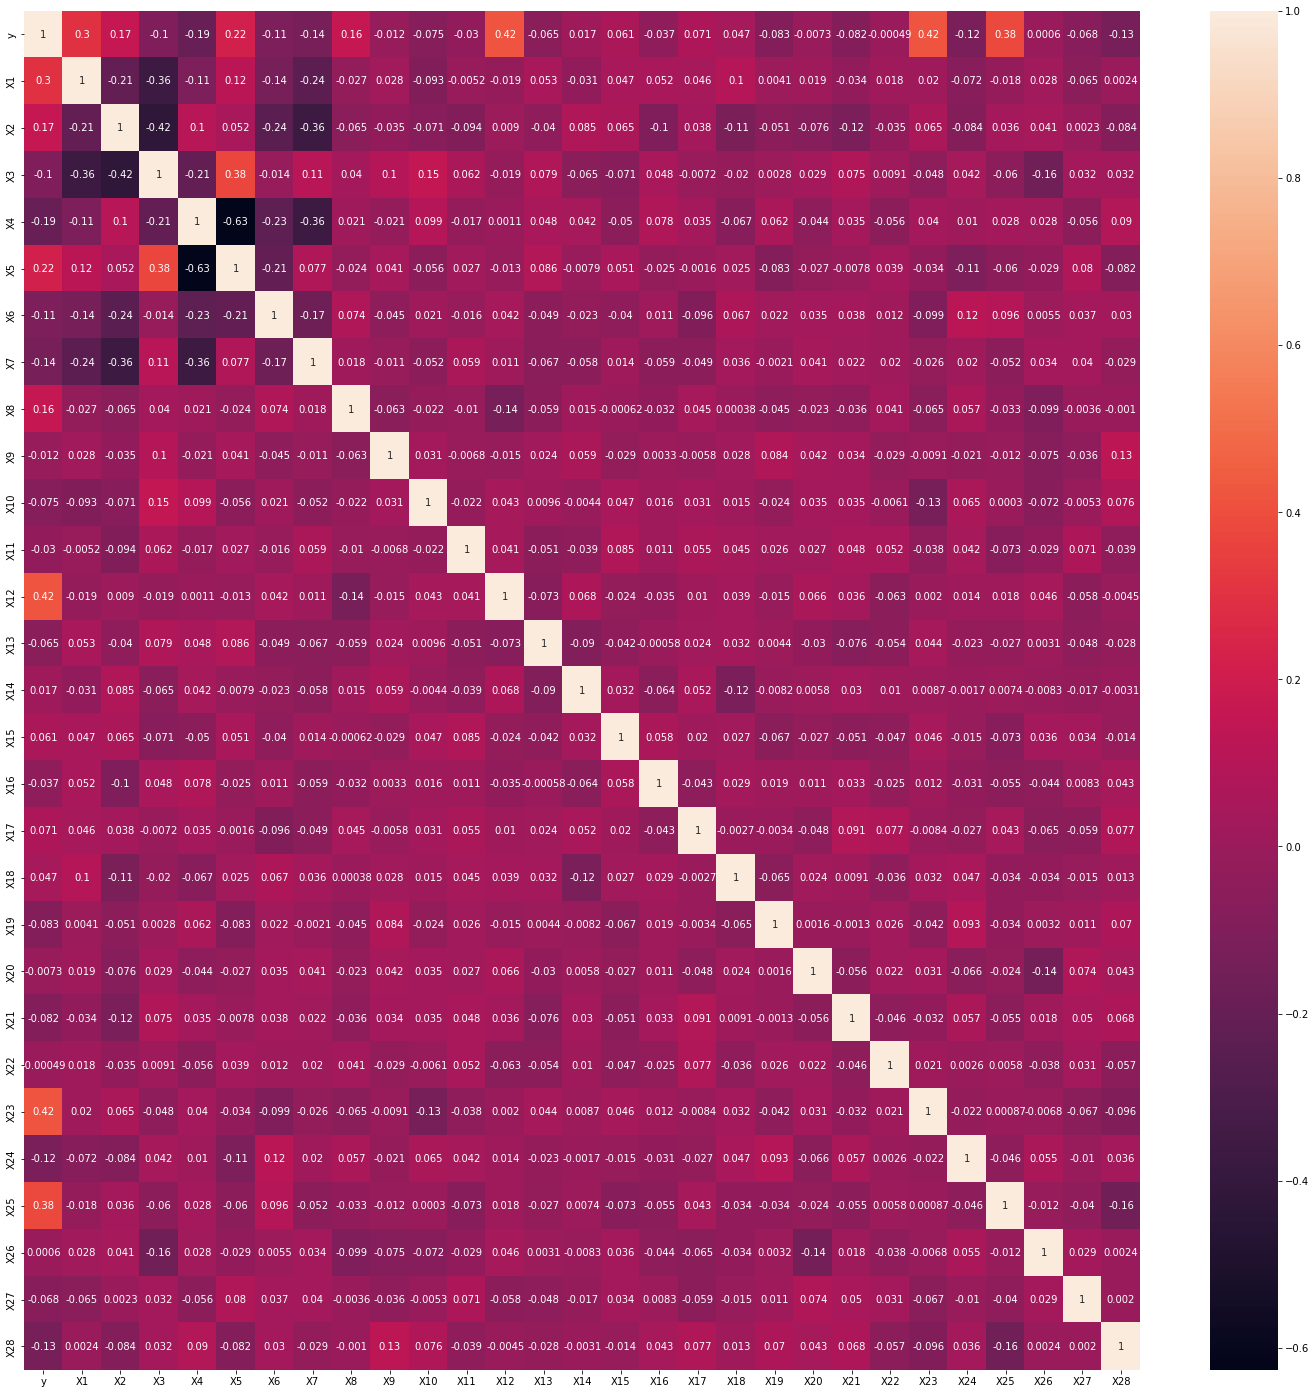

In [ ]:
# Correlation Matrix (All Features are Regression Variables and Target as Well)
fig, ax = plt.subplots(figsize=(25,25)) 
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True, ax=ax)
plt.show()

In [ ]:
# Features and target variable
X = df.drop(["y"], axis=1)
y = df["y"]

In [ ]:
# First 5 rows of features dataframe
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28
0,0.307466,0.824116,-0.846733,-0.143638,0.300534,-1.359660,0.628861,-0.279597,0.157514,0.540438,1.007308,1,0.480942,0.363332,-0.974595,1.101706,0.997576,-0.725205,0.696181,-1.262254,1.296678,0.614138,1.752095,0.281323,1.558272,-0.023032,-1.365495,0.427185
1,-1.315402,1.116190,1.225239,0.469824,0.384232,-2.042583,0.395624,-0.279597,-0.815925,-0.511833,-0.991781,-1,0.480942,1.680785,-0.974595,-0.458312,0.997576,-0.535517,-0.558306,0.837044,-0.676638,0.624464,1.686952,0.947605,-1.082189,0.268123,1.668811,-1.522387
2,-1.074268,-0.367363,1.095546,-1.089587,0.769244,1.387467,0.282123,-0.675355,1.455433,0.540438,-0.991781,1,-1.596081,1.477208,-0.974595,0.789703,-1.001457,-1.273894,-0.100169,1.647375,0.823037,-0.151400,-0.937613,-0.582855,0.522557,1.409339,-0.881565,-1.712130
3,0.161063,-0.856472,0.825221,0.207580,-0.034259,-1.207899,0.516608,-0.279597,-1.140404,0.540438,-0.991781,1,0.480942,-1.507049,1.025072,-0.770316,-1.001457,1.679620,-1.118178,-0.362336,0.450474,-1.657461,-0.961080,1.174146,-0.756722,0.273199,-0.008019,-0.195380
5,0.074944,-0.856472,-0.846733,0.488555,-1.038638,-0.768050,1.518154,0.701883,1.130953,0.540438,-0.991781,-2,-1.596081,0.670077,-0.974595,-0.770316,0.997576,-1.448202,0.619264,-1.528471,-0.800337,0.785168,0.104161,0.709302,1.206933,0.650232,-1.338852,-1.342788


In [ ]:
# First 5 rows of target dataframe
pd.DataFrame(y).head()

,y
0,2.661730
1,-0.227966
2,-1.389091
3,-0.311765
5,-2.613968


>1 -1.144 (0.082)
>2 -0.991 (0.108)
>3 -0.862 (0.113)
>4 -0.790 (0.097)
>5 -0.738 (0.086)
>6 -0.737 (0.084)
>7 -0.685 (0.106)
>8 -0.613 (0.088)
>9 -0.597 (0.082)
>10 -0.579 (0.067)
>11 -0.573 (0.070)
>12 -0.566 (0.068)
>13 -0.563 (0.067)
>14 -0.565 (0.067)
>15 -0.565 (0.067)
>16 -0.568 (0.067)
>17 -0.567 (0.067)
>18 -0.568 (0.067)
>19 -0.567 (0.065)
>20 -0.567 (0.064)
>21 -0.568 (0.064)
>22 -0.567 (0.064)
>23 -0.568 (0.064)
>24 -0.570 (0.066)
>25 -0.571 (0.066)
>26 -0.569 (0.066)
>27 -0.568 (0.067)
>28 -0.568 (0.067)


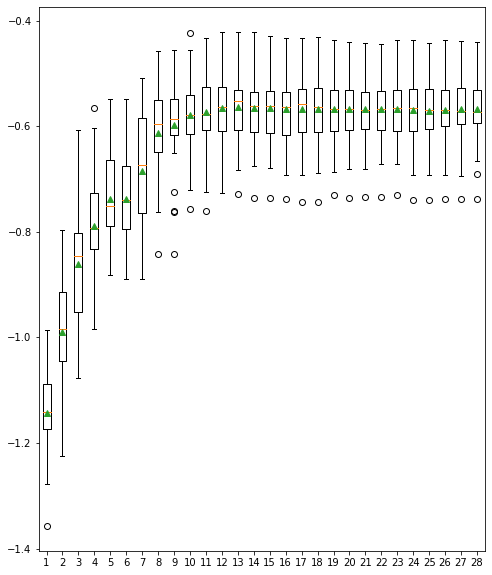

In [ ]:
# compare different numbers of features selected using f_regression
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# define number of features to evaluate
num_features = [i for i in range(X.shape[1]-27, X.shape[1]+1)]

# enumerate each number of features
results = list()
for k in num_features:
	# create pipeline
	model = LinearRegression()
	fs = SelectKBest(score_func=f_regression, k=k)
	pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
 
	# evaluate the model
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
	results.append(scores)
 
	# summarize the results
	print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))
 
# plot model performance for comparison
pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()

In [ ]:
# evaluation of a model using k features chosen with mutual information
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
 
# feature selection

def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_regression, k=7)
 
	# learn relationship from training data
	fs.fit(X_train, y_train)
 
	# transform train input data
	X_train_fs = fs.transform(X_train)
 
	# transform test input data
	X_test_fs = fs.transform(X_test)
 
	return X_train_fs, X_test_fs

# split into train and test
# X_train, X_test = select_features(X_train, y_train, X_test)
# X_train = pd.DataFrame(X_train)
# X_test = pd.DataFrame(X_test)

In [ ]:
# Select K Best Features Using Univariate Selection (Linear Regression F-Test Only For Regression Features with Regression Target)
best_features = SelectKBest(score_func = f_regression, k = 28)
fit_best_features = best_features.fit(X, y)

# Get scores for each categorical feature in relation to categorical target (Heart Disease) in one dataframe
scores_df = pd.DataFrame(fit_best_features.scores_)
features_df = pd.DataFrame(X.columns)
feature_scores = pd.concat([features_df, scores_df], axis = 1)
feature_scores.columns = ['Feature', 'Score']
feature_scores.nlargest(28, 'Score')

,Feature,Score
11,X12,97.786766
22,X23,96.693868
24,X25,78.458823
0,X1,43.601480
4,X5,23.265360
3,X4,16.966878
1,X2,12.841369
7,X8,12.764183
6,X7,8.528878
27,X28,8.224272


[0.06532813 0.02061253 0.0166647  0.03688304 0.03492771 0.00977191
 0.01211072 0.07936599 0.01095796 0.01021696 0.01051445 0.22160469
 0.01200806 0.01210196 0.0077694  0.00895469 0.00766855 0.00948927
 0.01026792 0.01029207 0.01105047 0.0113624  0.17700598 0.01361875
 0.1477685  0.00934489 0.00920725 0.01313108]


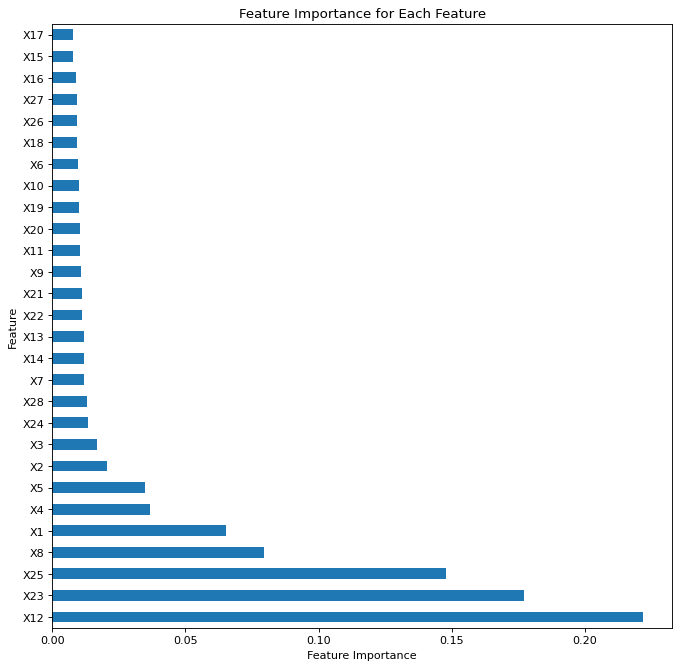

In [ ]:
# Feature Importance Using Extra Trees Decision Regressor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)
print(model.feature_importances_)

# Plotting graph of feature importance for each feature
feature_importance = pd.Series(model.feature_importances_, index = X.columns)
figure(figsize = (10,10), dpi = 80)
feature_importance.nlargest(28).plot(kind = 'barh')
plt.title('Feature Importance for Each Feature')
plt.ylabel('Feature')
plt.xlabel('Feature Importance')
plt.show()

In [ ]:
# Let's choose top 7 features here for Machine Learning modelling BASED on scores instead of feature importance
# chosen_features = list(feature_scores.nlargest(10, 'Score')['Feature'].iloc[0:10])
# X = X[chosen_features]

# Or let's choose features that are relatively high feature importance and/or scores (Judgement Call!)
chosen_features = ['X12', 'X23', 'X25', 'X1', 'X5', 'X8', 'X4', 'X2']
X = X[chosen_features]
X.head()

,X12,X23,X25,X1,X5,X8,X4,X2
0,1,1.752095,1.558272,0.307466,0.300534,-0.279597,-0.143638,0.824116
1,-1,1.686952,-1.082189,-1.315402,0.384232,-0.279597,0.469824,1.116190
2,1,-0.937613,0.522557,-1.074268,0.769244,-0.675355,-1.089587,-0.367363
3,1,-0.961080,-0.756722,0.161063,-0.034259,-0.279597,0.207580,-0.856472
5,-2,0.104161,1.206933,0.074944,-1.038638,0.701883,0.488555,-0.856472


Machine Learning Models and Predictions 

In [ ]:
# Splitting DataFrame into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Scaling Training and Testing Dataset (X_train and X_test) to Standardize/Normalize

def scaling(X_train, X_test):
  scaler = StandardScaler()

  X_train_scale = scaler.fit_transform(X_train)
  X_test_scale = scaler.transform(X_test)

  X_train_scale = pd.DataFrame(X_train_scale, columns = X_train.columns)
  X_test_scale = pd.DataFrame(X_test_scale, columns = X_test.columns)

  return X_train_scale, X_test_scale

In [ ]:
# Modelling on Revised Training Dataset  (X_train and y_train)
# Predicting on test set (X_test)

def predictions(model_name, X_train, X_test, y_train):
  model = model_name
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  return y_pred


def model_accuracy(model_name, X_train, X_test, y_train, y_test):
  y_pred = predictions(model_name, X_train, X_test, y_train)
    
  # calculating mean squared error
  mse = mean_squared_error(y_test, y_pred)

  # calculating root mean squared error
  rmse = mean_squared_error(y_test, y_pred, squared = False)

  # calculating mean absolute error
  mae = mean_absolute_error(y_test, y_pred)
    
  return mse, rmse, mae

In [ ]:
# Scaling Training Dataset (X_train and X_test) to Standardize/Normalize
X_train, X_test = scaling(X_train, X_test)

In [ ]:
# Using Multiple Linear Regression
linear_model = LinearRegression()
mse, rmse, mae = model_accuracy(linear_model, X_train, X_test, y_train, y_test) 
print("Mean Squared Error is: ", mse)
print("                            ")
print("Root Mean Squared Error is: ", rmse)
print("                            ")
print("Mean Absolute Error is: ", mae)
print("                            ")

Mean Squared Error is:  0.5683256708071892
                            
Root Mean Squared Error is:  0.7538737764421768
                            
Mean Absolute Error is:  0.5530728069177573
                            


n_estimators value with minimum mean absolute error:  (84, 0.5457507716566393)


Text(0, 0.5, 'Mean Absolute Error')

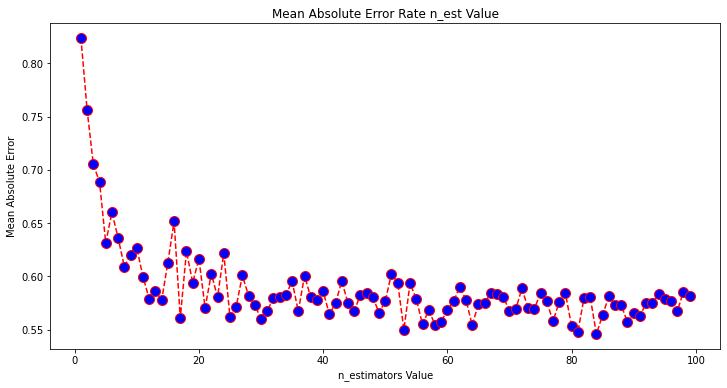

In [ ]:
# Best number of trees value for Random Forest Regressor Based on error rate
from sklearn.ensemble import RandomForestRegressor

error = []
n_est_with_error = []

# Picking optimal  k value after calculating error for k values between 1 and 40
for i in range(1, 100):
    rf=RandomForestRegressor(n_estimators=i)
    rf.fit(X_train, y_train)
    pred_i = rf.predict(X_test)
    error.append(mean_absolute_error(y_test, pred_i))
    n_est_with_error.append((i, mean_absolute_error(y_test, pred_i)))

print("n_estimators value with minimum mean absolute error: ", min(n_est_with_error, key=lambda x: x[1]))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Mean Absolute Error Rate n_est Value')
plt.xlabel('n_estimators Value')
plt.ylabel('Mean Absolute Error')

In [ ]:
# Using RandomForest Regressor 
from sklearn.ensemble import RandomForestRegressor
RFR_model = RandomForestRegressor(max_depth=min(n_est_with_error, key=lambda x: x[1])[0])
mse, rmse, mae = model_accuracy(RFR_model, X_train, X_test, y_train, y_test) 
print("Mean Squared Error is: ", mse)
print("                            ")
print("Root Mean Squared Error is: ", rmse)
print("                            ")
print("Mean Absolute Error is: ", mae)
print("                            ")

Mean Squared Error is:  0.5046992609849901
                            
Root Mean Squared Error is:  0.7104218894326033
                            
Mean Absolute Error is:  0.5568939207021363
                            


n_estimators value with minimum mean absolute error:  (8, 0.7803282378009999)


Text(0, 0.5, 'Mean Absolute Error')

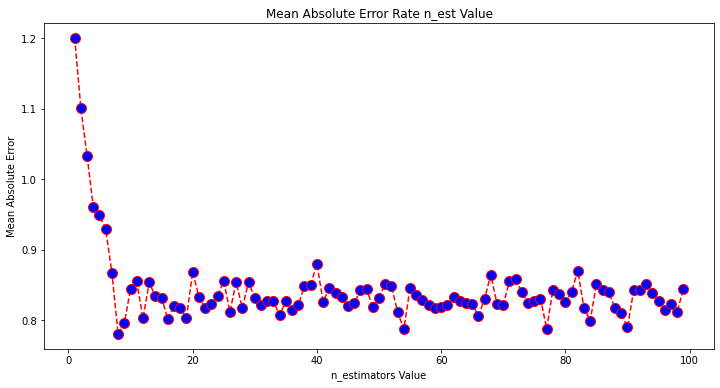

In [ ]:
# Best number of branches value for Decision Tree Regressor Based on error rate
from sklearn.tree import DecisionTreeRegressor

error = []
n_est_with_error = []

# Picking optimal  k value after calculating error for k values between 1 and 40
for i in range(1, 100):
    dt=DecisionTreeRegressor(max_depth=i)
    dt.fit(X_train, y_train)
    pred_i = dt.predict(X_test)
    error.append(mean_absolute_error(y_test, pred_i))
    n_est_with_error.append((i, mean_absolute_error(y_test, pred_i)))

print("n_estimators value with minimum mean absolute error: ", min(n_est_with_error, key=lambda x: x[1]))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Mean Absolute Error Rate n_est Value')
plt.xlabel('n_estimators Value')
plt.ylabel('Mean Absolute Error')

In [ ]:
# Using Decision Tree Regressor 
from sklearn.tree import DecisionTreeRegressor
DTR_model = DecisionTreeRegressor(max_depth=min(n_est_with_error, key=lambda x: x[1])[0])
mse, rmse, mae = model_accuracy(DTR_model, X_train, X_test, y_train, y_test) 
print("Mean Squared Error is: ", mse)
print("                            ")
print("Root Mean Squared Error is: ", rmse)
print("                            ")
print("Mean Absolute Error is: ", mae)
print("                            ")

Mean Squared Error is:  1.0554190312596983
                            
Root Mean Squared Error is:  1.0273358901837792
                            
Mean Absolute Error is:  0.7921850414485352
                            


In [ ]:
# Using Support Vector Regressor (SVR)
from sklearn.svm import SVR
SVR_model = SVR()
mse, rmse, mae = model_accuracy(SVR_model, X_train, X_test, y_train, y_test) 
print("Mean Squared Error is: ", mse)
print("                            ")
print("Root Mean Squared Error is: ", rmse)
print("                            ")
print("Mean Absolute Error is: ", mae)
print("                            ")

Mean Squared Error is:  0.4438199014176401
                            
Root Mean Squared Error is:  0.6661980947268163
                            
Mean Absolute Error is:  0.4912280309360896
                            


In [ ]:
# Using XGBoost Regressor 
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
mse, rmse, mae = model_accuracy(xgb_model, X_train, X_test, y_train, y_test) 
print("Mean Squared Error is: ", mse)
print("                            ")
print("Root Mean Squared Error is: ", rmse)
print("                            ")
print("Mean Absolute Error is: ", mae)
print("                            ")

Mean Squared Error is:  0.3368170866739235
                            
Root Mean Squared Error is:  0.5803594460969198
                            
Mean Absolute Error is:  0.44607369612884695
                            


Mean Squared Error is:  0.5666452763392693
                            
Root Mean Squared Error is:  0.7527584448807395
                            
Mean Absolute Error is:  0.5542515270753859
                            
Lasso picked 8 variables
Lasso eliminated 0 variables


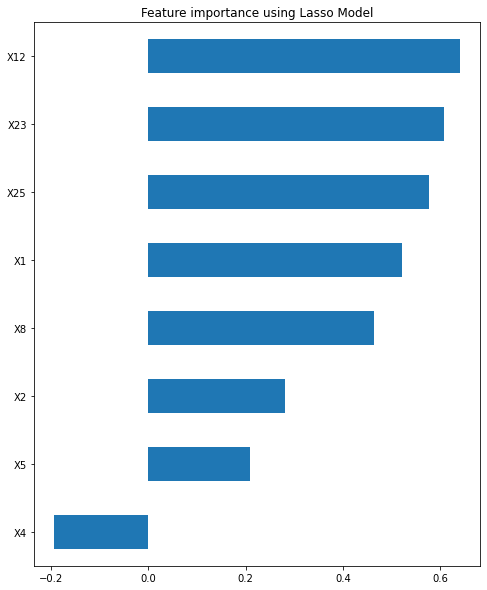

In [ ]:
# Using Lasso Regression 
from sklearn import linear_model
lassoReg = linear_model.Lasso(alpha=0.01)
mse, rmse, mae = model_accuracy(lassoReg, X_train, X_test, y_train, y_test) 
print("Mean Squared Error is: ", mse)
print("                            ")
print("Root Mean Squared Error is: ", rmse)
print("                            ")
print("Mean Absolute Error is: ", mae)
print("                            ")

coef = pd.Series(lassoReg.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

print("Lasso picked " + str(sum(coef != 0)) + " variables")
print("Lasso eliminated " +  str(sum(coef == 0)) + " variables")

Mean Squared Error is:  0.5683232123041653
                            
Root Mean Squared Error is:  0.7538721458604007
                            
Mean Absolute Error is:  0.553075636599723
                            


Text(0.5, 1.0, 'Feature importance using Ridge Model')

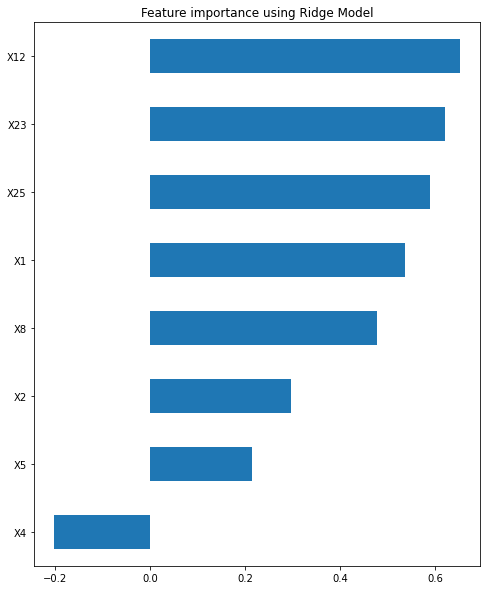

In [ ]:
# Using Ridge Regression  
ridgeReg = linear_model.Ridge(alpha=0.01)
mse, rmse, mae = model_accuracy(ridgeReg, X_train, X_test, y_train, y_test) 
print("Mean Squared Error is: ", mse)
print("                            ")
print("Root Mean Squared Error is: ", rmse)
print("                            ")
print("Mean Absolute Error is: ", mae)
print("                            ")

coef = pd.Series(ridgeReg.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")

Making Predictions (Using Best Model XGBoost Regressor)

In [ ]:
# Load test data
test_df = pd.read_csv('/content/gdrive/MyDrive/test_predictors.csv')
test_df.drop(['1:500'], axis = 1, inplace = True)
test_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28
0,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069,-1.464884,0.540438,-0.991781,-1,-0.557570,1.312690,-0.974595,-1.082320,-1.001457,-1.248257,1.031736,0.473749,1.342874,-0.819992,0.305344,-0.985304,-1.391609,0.604784,0.602631,-0.734737
1,-0.145138,0.464818,-0.846733,2.174405,-1.038638,-0.526262,-1.291914,0.701883,-0.166965,1.592709,-0.991781,2,0.480942,1.145028,1.025072,1.413710,0.997576,-0.270299,-0.049595,1.128359,1.496292,-0.256661,-1.445342,-1.242527,-1.325391,0.775921,-1.374703,0.573786
2,0.945704,0.244603,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221,-0.815925,0.540438,1.007308,-1,-1.596081,-0.398720,1.025072,-0.458312,-1.001457,-0.703490,-1.223899,1.552879,-0.342293,-0.918067,1.567707,-0.670887,0.193915,0.394013,0.019508,-0.742269
3,-0.145138,0.464818,-0.846733,2.174405,-1.038638,-0.526262,-1.291914,-0.279597,1.130953,-0.511833,1.007308,0,-1.596081,1.180887,1.025072,1.413710,-1.001457,1.273047,-1.305726,-1.081400,-1.655457,-0.029551,1.262072,-0.748580,-1.698520,0.656629,-1.069452,1.646807
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,0.701883,0.806474,0.540438,-0.991781,0,-1.596081,-0.154800,-0.974595,1.101706,0.997576,-0.551979,-1.307506,0.250987,0.220282,-1.153420,0.954715,0.363681,0.609430,-1.201761,-1.493956,0.195279


In [ ]:
# Chosen number of features applied to test_df
test_df = test_df[chosen_features]
test_df.head()

,X12,X23,X25,X1,X5,X8,X4,X2
0,-1,0.305344,-1.391609,-0.790075,-1.038638,4.976069,0.488555,0.678079
1,2,-1.445342,-1.325391,-0.145138,-1.038638,0.701883,2.174405,0.464818
2,-1,1.567707,0.193915,0.945704,-1.038638,5.055221,2.174405,0.244603
3,0,1.262072,-1.698520,-0.145138,-1.038638,-0.279597,2.174405,0.464818
4,0,0.954715,0.609430,-0.790075,-1.038638,0.701883,0.488555,0.678079


In [ ]:
# Scaling Training Dataset (X and test_df) to Standardize/Normalize
X_train, X_test = scaling(X, test_df)

In [ ]:
# Using XGBoost Regressor as Chosen Model to Train and Predict
model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
y_pred = pd.DataFrame(predictions(model, X_train, X_test, y), columns = ['y_predictions'])
y_pred.head()

,y_predictions
0,-1.339142
1,-0.547553
2,0.485754
3,0.044991
4,1.831824
